<h1 align = "center">Clustering algorithm</h1>

Note: This notebook is an excerpt from the Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a>

<div class="alert alert-info">
Clustering is a Machine Learning technique that involves the grouping of similar data points into different clusters/groups. Clusteing is similar to classification but unlike classification, clustering is a non-supervised machine learning algorithm. It automatically group data without lables into similar groups
</div>

<div class="alert alert-info">
The data that we're going to be working with is the Titanic Dataset.
You can download the dataset <a href= https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls> here</a> or simply put the link as reference when reading the file.

The aim is to know the chance of survival of a pasenger based on various information. This is a brief overview of the data and values:<br>

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
survival: Survival (0 = No; 1 = Yes)<br>
name: Name<br>
sex: Sex<br>
age: Age<br>
sibsp: Number of Siblings/Spouses Aboard<br>
parch: Number of Parents/Children Aboard<br>
ticket: Ticket Number<br>
fare: Passenger Fare (British pound)<br>
cabin: Cabin<br>
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat: Lifeboat<br>
body: Body Identification Number<br>
home.dest: Home/Destination<br>

<p>This dataset is a labeled dataset(it has the survival label). So for the sake of the clustering algorithm, we will drop the survival column. We would also drop some other column that don't have an impact on our analysis.<p>
    
<p>There are two types of clustering:
    <li><b>Flat Clustering:</b> is where the programmer tells the machine how many categories to cluster the data into.</li>
    <li><b>Hierarchical:</b> is where the machine is allowed to decide how many clusters to create based on its own algorithms.</li>
 
<p>There are a number of clustering algorithms, but for this notebook, we would only treat two of the common ones:
    <li><b>KMeans</b> which is a flat clustering algorithm</li>
        <li><b>Mean shift</b> which is an hierarchical clustering algorithm</li></p>
</div>

<h2>KMeans Clustering</h2>

<div class="alert alert-info">
KMeans is a flat clustering algorithm. It is one of the most widely used flat clustering algorithm because of it's simplicity. We would explore the algorithm using the titanic data set.</div>

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_excel('https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<div class="alert alert-info">
    Looking at the data, you can see that there are a lot of non-numerical data here. We need to find a way to handle this non-numeric data because KMeans (just like every other machine learning algorithm) requires numerical data.  So, we have to look for a way to handle non-numeric data. There are many ways this can be done. However, we will use the approach below. We will also drop some columns like 'name' that don't have any impact on our prediction</div>

<h3>Handling Non-numeric data</h3>

In [14]:
df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)       
df.fillna(0, inplace=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [15]:
df = handle_non_numerical_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,761,211.3375,38,3,2,279
1,1,1,1,0.9167,1,2,527,151.5500,167,3,8,2
2,1,0,0,2.0000,1,2,527,151.5500,167,3,0,2
3,1,0,1,30.0000,1,2,527,151.5500,167,3,0,2
4,1,0,0,25.0000,1,2,527,151.5500,167,3,0,2


<div class="alert alert-info">
You can see that each non-numeric value has been given a corresponding numeric value. For example, the sex column now has values 0 and 1 where 0 is Female and 1 is Male<br>
We would now go ahead and use KMeans to group our data and compare the accuracy. 
</div>

<h3>Clustering with KMeans</h3>

In [34]:
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

score = correct/len(X)

if score < 0.5:
    score = 1 - score
else:
    score = score

print(score)

0.7135217723453018


In [ ]:
# add/remove features just to see impact they have.
#df.drop(['ticket','home.dest'], 1, inplace=True)
#df.drop(['sex','boat'], 1, inplace=True)
#df.drop(['ticket'], 1, inplace = True)

<h3>KMeans from scratch</h3>

<div class="alert alert-info">
We will now build our own KMeans algorithm from scratch.</div>

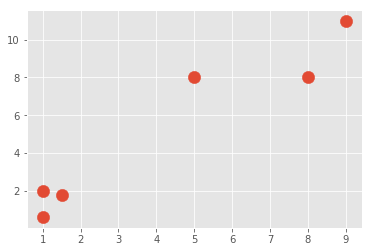

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

<div class="alert alert-info">
Let's test our KMeans algorithm with the dataset above</div>

453.3333333333334
102.72108843537411


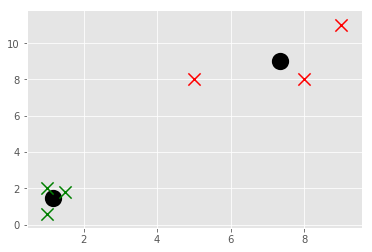

In [37]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

<div class="alert alert-info">
    Let's test some new data points and see how our algorithm will group them</div>

453.3333333333334
102.72108843537411


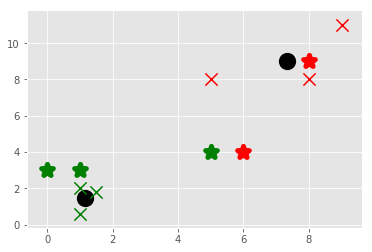

In [38]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

        
        
unknowns = np.array([[1,3],
                    [8,9],
                    [0,3],
                    [5,4],
                    [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

<h2>Mean shift Heirarchical clustering</h2>

[[ 3.49212843  3.43684881  3.30011336]
 [ 2.99976497 10.05776402  9.53336568]]
Number of estimated clusters: 2


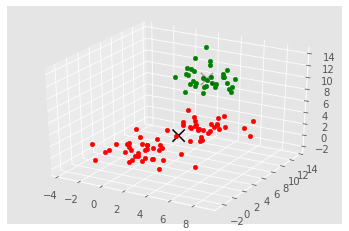

In [32]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

<h3>Mean shift on titanic dataset</h3>

In [44]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt


original_df = pd.DataFrame.copy(df)


X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [45]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
    
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.384310618066561, 1: 0.0, 2: 0.8235294117647058, 3: 0.1}


In [8]:
print(original_df[ (original_df['cluster_group']==1) ])

     pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  cluster_group  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA            1.0  
50     3   NaN                    Germantown, Philadelphia, PA           

In [9]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived         age        sibsp        parch  \
count  1233.000000  1233.000000  982.000000  1233.000000  1233.000000   
mean      2.340633     0.374696   29.486507     0.423358     0.287916   
std       0.812311     0.484241   14.233784     0.815340     0.638834   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     5.000000     4.000000   

              fare        body  cluster_group  
count  1232.000000  112.000000         1233.0  
mean     24.282829  162.973214            0.0  
std      26.029718   98.946474            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.500000            0.0  
50%      13.000000  167.500000            0.0  
75%   

In [47]:
cluster_0 = (original_df[ (original_df['cluster_group']==1) ])
cluster_0_fc = (cluster_0[ (cluster_0['pclass']==3) ])
print(cluster_0_fc.describe())

       pclass  survived        sex        age      sibsp  parch      ticket  \
count    20.0      20.0  20.000000  20.000000  20.000000   20.0   20.000000   
mean      3.0       0.0   0.500000   5.375000   6.100000    2.0  536.300000   
std       0.0       0.0   0.512989   5.828413   1.803505    0.0  320.901707   
min       3.0       0.0   0.000000   0.000000   4.000000    2.0   65.000000   
25%       3.0       0.0   0.000000   0.000000   4.750000    2.0   65.000000   
50%       3.0       0.0   0.500000   3.000000   5.000000    2.0  656.000000   
75%       3.0       0.0   1.000000  10.250000   8.000000    2.0  784.000000   
max       3.0       0.0   1.000000  16.000000   8.000000    2.0  784.000000   

            fare  cabin  embarked  boat   home.dest  cluster_group  
count  20.000000   20.0      20.0  20.0   20.000000           20.0  
mean   53.186250    0.0       3.0   0.0  102.900000            1.0  
std    16.299123    0.0       0.0   0.0  100.075182            0.0  
min    31.27

<h3>Mean shift from scratch</h3>

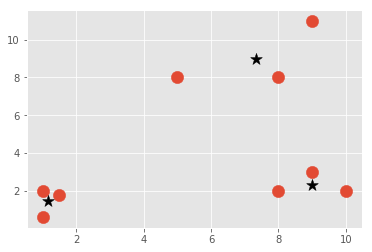

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

<h3>References</h3>

This is a reproduction of the Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a>